In [127]:
import pandas as pd
df=pd.read_csv('refine_dataset.csv')
print(df.shape)

(507, 19)


In [128]:
df_encoded = pd.read_pickle("df_encoded.pkl")

In [129]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             507 non-null    int64  
 1   Trail_name             507 non-null    object 
 2   Difficulty             507 non-null    object 
 3   Average_rating         507 non-null    float64
 4   number_of_reviews      507 non-null    int64  
 5   Length (in km)         507 non-null    float64
 6   Tags                   507 non-null    object 
 7   Est_time               507 non-null    float64
 8   latitude               507 non-null    float64
 9   longitude              507 non-null    float64
 10  current_temperature    507 non-null    float64
 11  current_windspeed      507 non-null    float64
 12  current_winddirection  507 non-null    float64
 13  current_weather_code   507 non-null    float64
 14  City                   507 non-null    object 
 15  State 

,Unnamed: 0,Average_rating,number_of_reviews,Length (in km),Est_time,latitude,longitude,current_temperature,current_windspeed,current_winddirection,current_weather_code
count,507.000000,507.000000,507.000000,507.000000,5.070000e+02,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,261.696252,4.509073,7.700197,9.878895,2.388073e+02,21.344246,76.490817,23.795069,8.104536,232.564103,14.276134
std,150.424874,0.467941,14.924343,22.725397,1.479389e-12,7.554961,3.535201,3.764290,4.721346,42.142697,28.691811
min,0.000000,3.000000,1.000000,0.200000,2.388073e+02,8.079252,70.458246,5.700000,0.800000,5.000000,1.000000
25%,132.500000,4.200000,2.000000,3.150000,2.388073e+02,14.543963,73.854507,22.550000,4.900000,213.500000,3.000000
50%,261.000000,4.600000,4.000000,6.000000,2.388073e+02,18.912765,76.611198,24.400000,7.200000,232.564103,3.000000
75%,390.500000,5.000000,8.000000,10.550000,2.388073e+02,29.514989,77.622600,26.000000,10.000000,260.000000,3.000000
max,524.000000,5.000000,227.000000,341.700000,2.388073e+02,34.321053,94.095200,31.600000,25.600000,333.000000,95.000000


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns


 
<span style="font-size:20pt">📊 Distribution Plots for Key Numeric Columns</span>


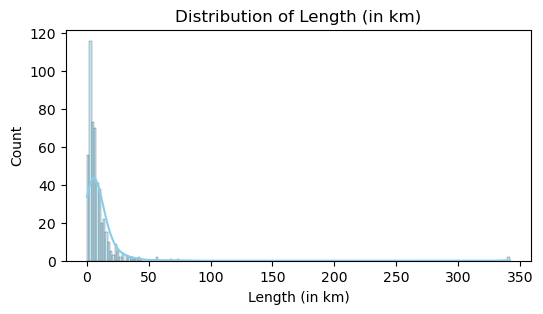

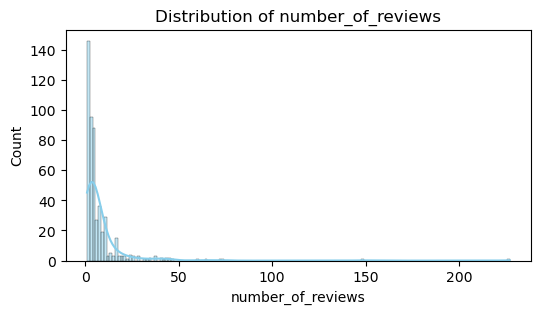

In [131]:
numeric_cols = ['Length (in km)', 'number_of_reviews']
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

<span style="font-size:20pt">📊 Average rating by State</span>

In [132]:
filtered_df = df[df['number_of_reviews'] > 50]
state_avg_rating = (
    filtered_df.groupby('State')['Average_rating']
    .mean()
    .sort_values(ascending=False)
)


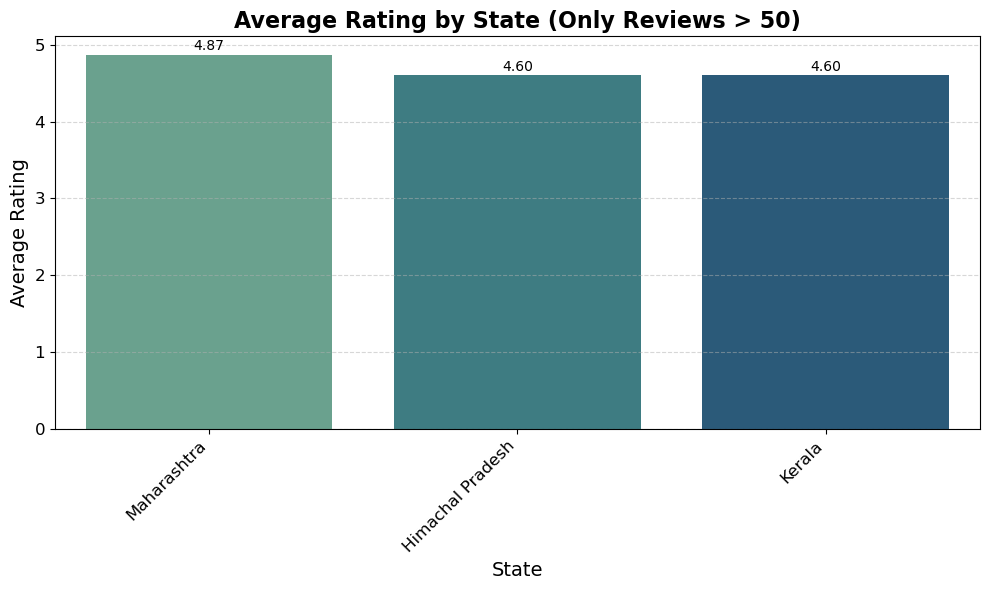

In [133]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=state_avg_rating.index,
    y=state_avg_rating.values,
    palette='crest'
)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Average Rating by State (Only Reviews > 50)', fontsize=16, fontweight='bold')
plt.ylabel('Average Rating', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on bars
for i, val in enumerate(state_avg_rating.values):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



In [134]:
top_state = state_avg_rating.idxmax()
top_rating = state_avg_rating.max()

print(f"State with highest average rating (reviews > 50): {top_state} ({top_rating:.2f})")


State with highest average rating (reviews > 50): Maharashtra (4.87)


<span style="font-size:20pt">📊 Best rated season</span>

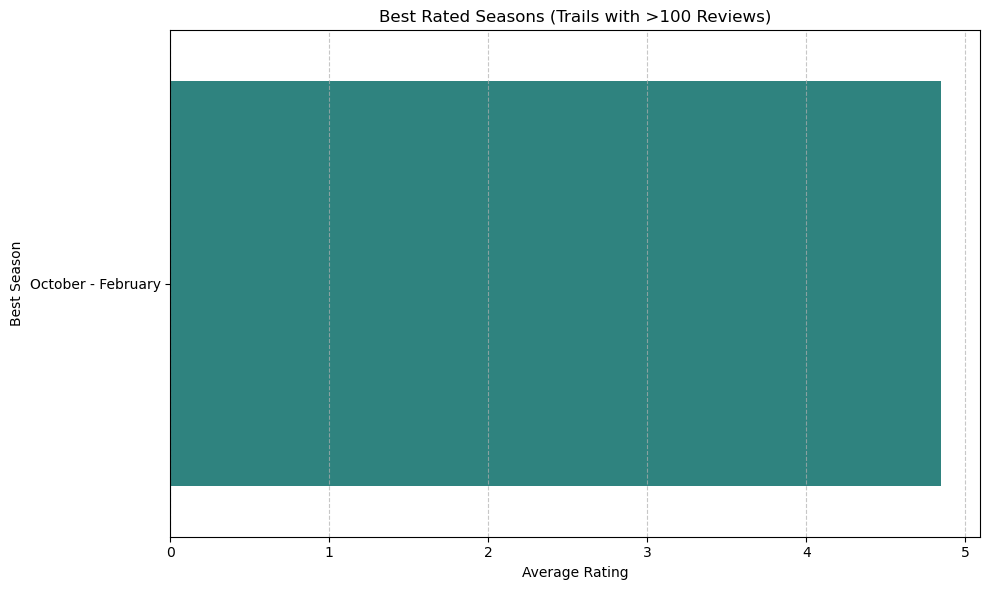

In [135]:

# Filter for popular trails with number of reviews > 100
popular_trails = df[df["number_of_reviews"] > 100]

# Group by Best_Season and calculate average rating
season_rating = popular_trails.groupby("Best_Season")["Average_rating"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=season_rating.values, y=season_rating.index, palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Best Season")
plt.title("Best Rated Seasons (Trails with >100 Reviews)")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [136]:
df

,Unnamed: 0,Trail_name,Difficulty,Average_rating,number_of_reviews,Length (in km),Tags,Est_time,latitude,longitude,current_temperature,current_windspeed,current_winddirection,current_weather_code,City,State,Country,Best_Season,tags_list
0,0,Triund Trek Loop,Hard,4.6,72,19.0,"camping, bird watching, hiking, snowshoeing, b...",238.807278,32.205251,76.325060,25.9,2.3,231.000000,3.0,Dharmshala,Himachal Pradesh,India,"April - June, September - November","['scramble', 'views', 'hiking', 'camping', 'sn..."
1,1,Sinhagad Fort,Hard,4.8,227,8.0,"hiking, walking, partially paved, forest, view...",238.807278,18.303603,73.582464,22.0,7.7,233.000000,3.0,Velhe,Maharashtra,India,October - February,"['walking', 'scramble', 'views', 'hiking', 'hi..."
2,2,Blackberry Hill - Attukad Falls Loop,Moderate,4.6,64,9.3,"hiking, mountain biking, partially paved, fore...",238.807278,10.086996,77.060091,22.0,10.3,282.000000,3.0,Munnar,Kerala,India,September - March,"['views', 'hiking', 'waterfall', 'wildflowers'..."
3,3,Triund Hill Trek,Hard,4.6,73,9.5,"camping, bird watching, hiking, snowshoeing, w...",238.807278,32.214304,76.319672,25.1,2.3,231.000000,3.0,Dharamsala,Himachal Pradesh,India,"April - June, September - November","['walking', 'scramble', 'views', 'hiking', 'ca..."
4,4,Skandagiri Hills (Kalawara Betta),Hard,4.5,47,6.0,"bird watching, hiking, forest, views, wildflow...",238.807278,13.099376,77.388729,21.6,17.6,255.000000,3.0,Chikkaballapur,Karnataka,India,October - February,"['scramble', 'views', 'hiking', 'bugs', 'histo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,520,Ashtaar Valley,Hard,5.0,2,18.7,"camping, bird watching, hiking, snowshoeing, b...",238.807278,33.866999,74.590867,10.4,5.1,51.000000,3.0,Khansahib Tehsil,Jammu and Kashmir,India,May - October,"['scramble', 'views', 'hiking', 'camping', 'sn..."
503,521,Sunrise Point Sunderkhal,Easy,5.0,2,1.3,"bird watching, hiking, mountain biking, walkin...",238.807278,29.316697,79.728816,24.4,7.2,232.564103,3.0,Dhari,Uttarakhand,India,"March - June, September - November","['walking', 'views', 'hiking', 'wildflowers', ..."
504,522,Bannerghatta- Thotikkalu falls Cycling,Hard,5.0,1,27.4,"bird watching, mountain biking, road biking, p...",238.807278,12.710315,77.688619,22.5,17.0,265.000000,3.0,Anekal,Karnataka,India,October - February,"['road biking', 'views', 'waterfall', 'wildlif..."
505,523,Yuksom - Khecheopalri Lake,Hard,5.0,2,16.9,"bird watching, hiking, walking, forest, river,...",238.807278,27.418517,88.180834,24.4,7.2,232.564103,3.0,Gyalshing,Sikkim,India,All Year,"['walking', 'scramble', 'views', 'hiking', 'wi..."


<span style="font-size:20pt">📊 Most common tages used</span>

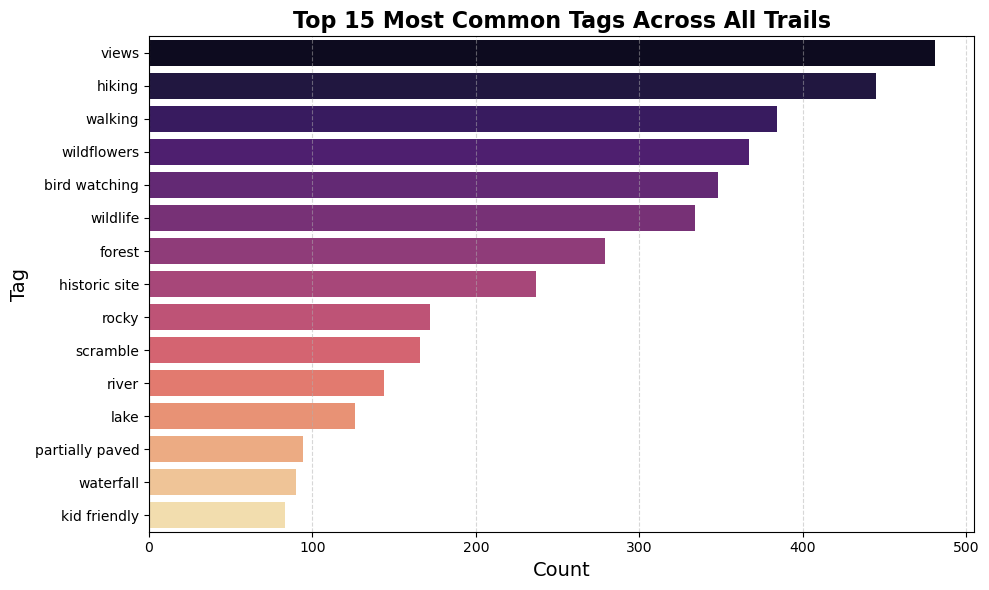

In [137]:
# Split the 'Tags' column into individual tags
tags_series = df['Tags'].str.split(',').explode().str.strip()

# Count occurrences
tag_counts = tags_series.value_counts().head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=tag_counts.index, x=tag_counts.values, palette='magma')
plt.title('Top 15 Most Common Tags Across All Trails', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Tag', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<span style="font-size:20pt">📊 Trek Length By difficulty</span>

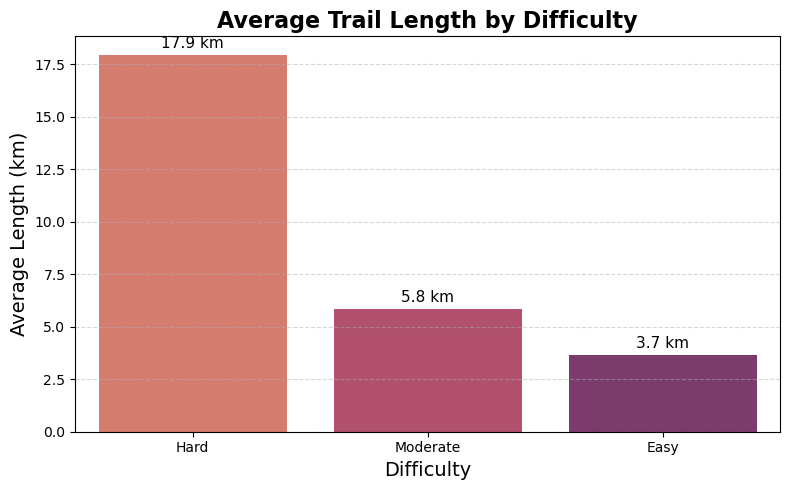

In [138]:
# Calculate average trail length by difficulty
length_by_difficulty = df.groupby('Difficulty')['Length (in km)'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=length_by_difficulty.index,
    y=length_by_difficulty.values,
    palette='flare'
)
plt.title('Average Trail Length by Difficulty', fontsize=16, fontweight='bold')
plt.xlabel('Difficulty', fontsize=14)
plt.ylabel('Average Length (km)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add labels on bars
for i, val in enumerate(length_by_difficulty.values):
    plt.text(i, val + 0.2, f"{val:.1f} km", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


<span style="font-size:20pt">📊 number of treks through pie chart</span>

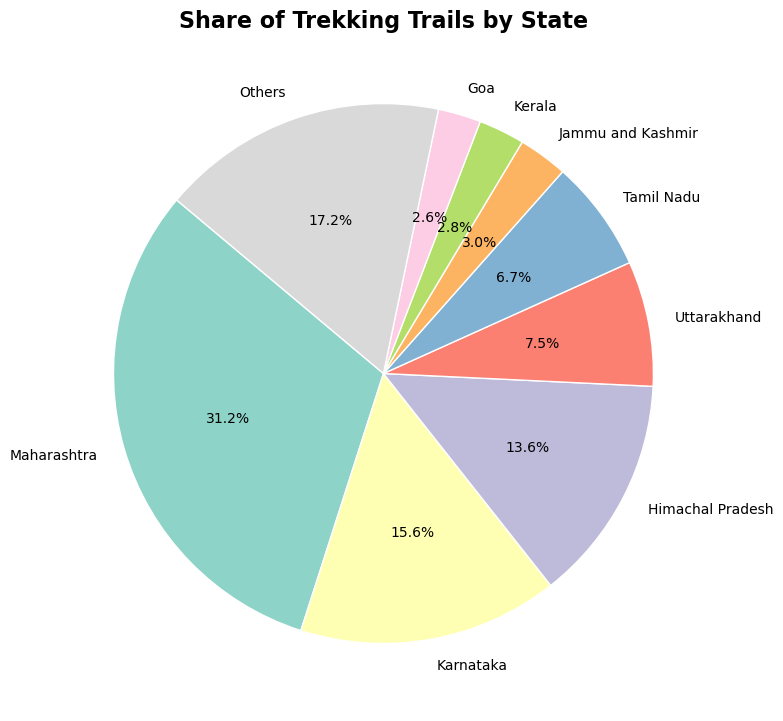

In [139]:
# Count number of treks per state
state_counts = df['State'].value_counts()

# Optional: focus on top N states for clarity
top_n = 8
top_states = state_counts.head(top_n)
other_sum = state_counts[top_n:].sum()

# Add "Others" category
top_states['Others'] = other_sum

# Plot
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set3', n_colors=len(top_states))
plt.pie(
    top_states.values,
    labels=top_states.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Share of Trekking Trails by State', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


<span style="font-size:20pt">📊 most preferred season in the state of maharashtra</span>

Most preferred trekking season in Maharashtra: October - February


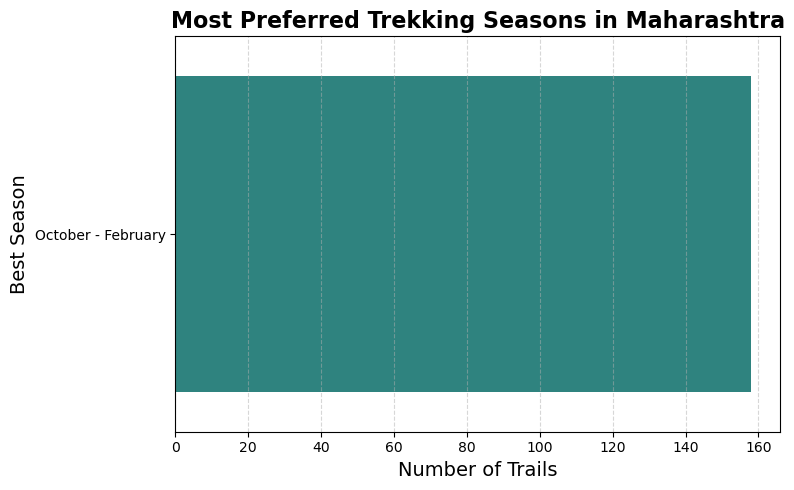

In [140]:
# Filter for Maharashtra trails
maha_df = df[df['State'].str.lower() == 'maharashtra']

# Count best season occurrences
season_counts = maha_df['Best_Season'].value_counts()

# Display most common season
print("Most preferred trekking season in Maharashtra:", season_counts.idxmax())

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=season_counts.values,
    y=season_counts.index,
    palette='viridis'
)
plt.title('Most Preferred Trekking Seasons in Maharashtra', fontsize=16, fontweight='bold')
plt.xlabel('Number of Trails', fontsize=14)
plt.ylabel('Best Season', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<span style="font-size:20pt">trail length vs actual rating</span>

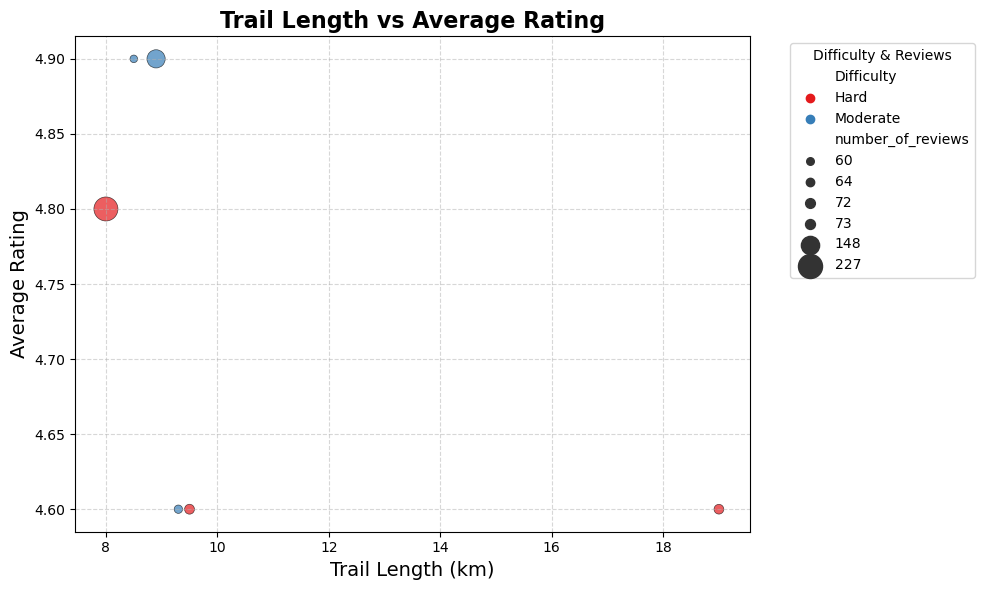

In [141]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_df,
    x='Length (in km)',
    y='Average_rating',
    hue='Difficulty',
    size='number_of_reviews',
    palette='Set1',              # Clear, contrasting colors
    sizes=(30, 300),
    alpha=0.7,
    edgecolor='k'
)

plt.title('Trail Length vs Average Rating', fontsize=16, fontweight='bold')
plt.xlabel('Trail Length (km)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.legend(title='Difficulty & Reviews', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<span style="font-size:20pt">📊 Heatmap for state with most difficult treks</span>

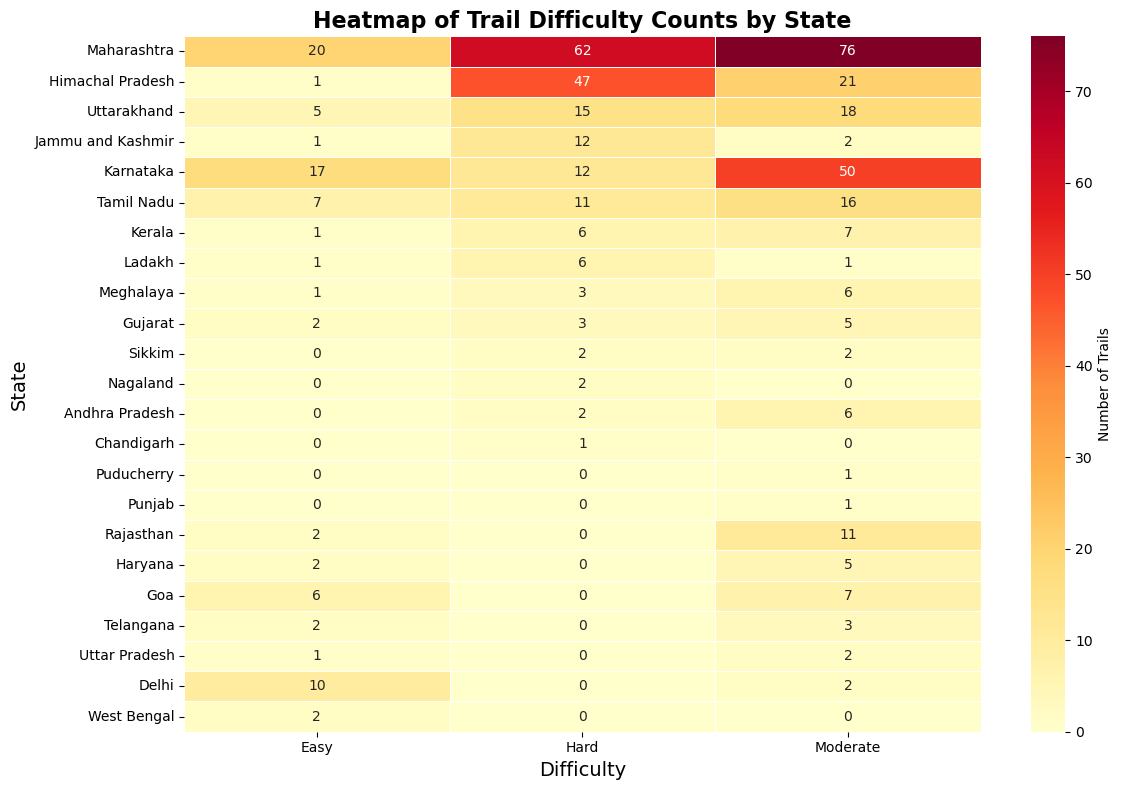

In [142]:

# Create a pivot table of counts
difficulty_state_pivot = df.pivot_table(
    index='State',
    columns='Difficulty',
    values='Trail_name',
    aggfunc='count',
    fill_value=0
)

# Optional: sort states by Hard count for better visual
difficulty_state_pivot = difficulty_state_pivot.sort_values(by='Hard', ascending=False)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    difficulty_state_pivot,
    annot=True,
    fmt='d',
    cmap='YlOrRd',
    linewidths=0.5,
    cbar_kws={'label': 'Number of Trails'}
)

plt.title('Heatmap of Trail Difficulty Counts by State', fontsize=16, fontweight='bold')
plt.xlabel('Difficulty', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.tight_layout()
plt.show()


Average Rating vs. Current Temperature

Text(0.5, 1.0, 'Average Rating vs Current Temperature')

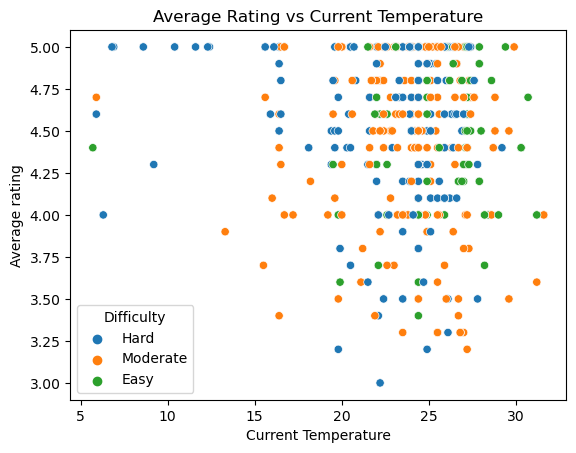

In [143]:
import seaborn as sns
sns.scatterplot(data=df, x='current_temperature', y='Average_rating', hue='Difficulty')
plt.xlabel("Current Temperature")
plt.ylabel("Average rating")
plt.title("Average Rating vs Current Temperature")


Trail Popularity vs. Windspeed

Text(0.5, 1.0, 'Trail Popularity Vs Windspeed')

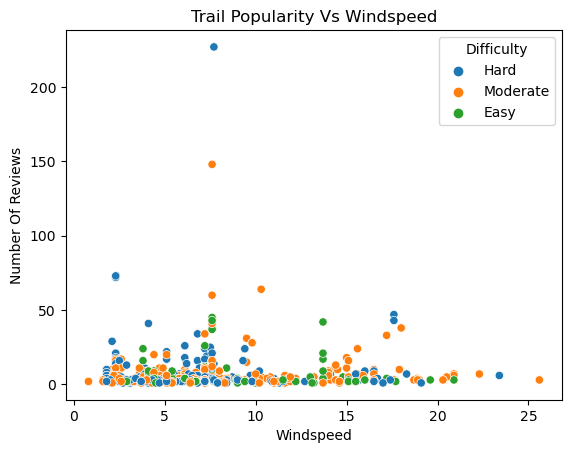

In [144]:
sns.scatterplot(data=df, x='current_windspeed', y='number_of_reviews', hue='Difficulty')
plt.xlabel("Windspeed")
plt.ylabel("Number Of Reviews")
plt.title("Trail Popularity Vs Windspeed")

Which locations have best-rated treks in good weather

In [145]:
print(df.columns.tolist())


['Unnamed: 0', 'Trail_name', 'Difficulty', 'Average_rating', 'number_of_reviews', 'Length (in km)', 'Tags', 'Est_time', 'latitude', 'longitude', 'current_temperature', 'current_windspeed', 'current_winddirection', 'current_weather_code', 'City', 'State', 'Country', 'Best_Season', 'tags_list']


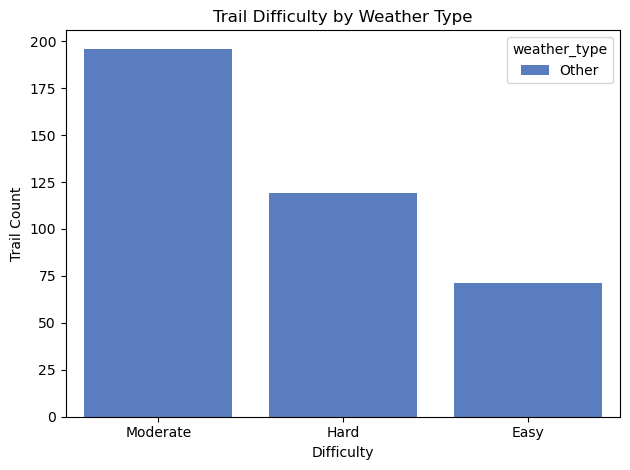

In [154]:
sns.countplot(data=df_clean, x='Difficulty', hue='weather_type', palette='muted')
plt.title("Trail Difficulty by Weather Type")
plt.xlabel("Difficulty")
plt.ylabel("Trail Count")
plt.tight_layout()
plt.show()


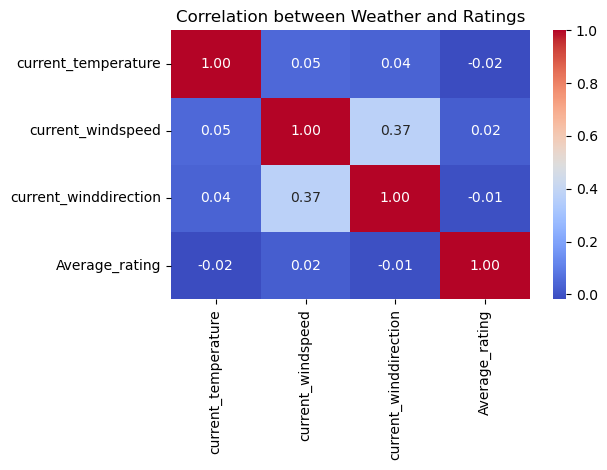

In [158]:
weather_cols = ['current_temperature', 'current_windspeed', 'current_winddirection', 'Average_rating']
sns.heatmap(df_clean[weather_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Weather and Ratings")
plt.tight_layout()
plt.show()
